<a href="https://colab.research.google.com/github/enps2015/TelosSimuladorNivel2/blob/main/SimuladorNivel02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simulador Télos - Nível 2 trilha de Dados**

## **Análise de notas e alunos utilizano o PySpark**

## **Contextualizando:**

A análise de dados é crucial para as organizações modernas, permitindo-lhes
tomar decisões informadas rapidamente. Utilizar ferramentas como PySpark para
processar e analisar dados não só aumenta a eficiência operacional, mas também
fornece insights valiosos que podem ser transformados em ações estratégicas.

Portanto, a capacidade de aplicar técnicas de análise de dados é fundamental
para qualquer profissional no campo da ciência de dados. Neste simulador, sua
squad foi contratada pela DataTech Solutions para desenvolver uma série de
análises em um dataset de notas de alunos, utilizando PySpark para extrair
insights que ajudarão na tomada de decisões educacionais.

## **Análises a serem feitas**

## **1 - Visualização e Análise inicial dos Dados**

In [ ]:
# Instalando bibliotecas necessarias
!pip install pyspark pandas matplotlib seaborn

In [104]:
# Importando as bibliotecas necessárias para o projeto
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, lower, trim, avg, corr, when
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Montando o Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Criando a SparkSession
spark = SparkSession.builder.appName("AnaliseDesempenhoEscolar").getOrCreate()

In [30]:
# Carregando o Dataset (do Google Drive)
df = spark.read.csv("/content/drive/My Drive/Telos/TrilhaDados/SimuladorNivel02/notas_alunos.csv", header=True, inferSchema=True, sep=";")

In [31]:
# Mostrando as primeiras linhas do DataFrame
print("Primeiras Linhas do DataFrame:")

# Exibe as 20 primeiras linhas
df.show()

Primeiras Linhas do DataFrame:
+---+---------+-------------+--------------------+-------------+-----------------+------------------+---------------+--------------+---------+-----------------+-------------+----------------+---------------+--------------+
| Id|   Genero|RendaFamiliar|     EducacaoPaterna|PeriodoDeAula|FezAulaParticular|EstadoCivilDosPais|PraticaEsportes|FilhoMaisVelho|NumIrmaos|TransporteEscolar|HorasDeEstudo|notaDeMatematica|notaDePortugues|notaDeCiencias|
+---+---------+-------------+--------------------+-------------+-----------------+------------------+---------------+--------------+---------+-----------------+-------------+----------------+---------------+--------------+
|  0| feminino|         NULL|   superior completo|     matutino|              nao|            casado|   regularmente|           sim|        3|           onibus|          < 5|              71|             71|            74|
|  1| feminino|      grupo C| superior incompleto|     matutino|             

In [32]:
# Exibindo o esquema do DataFrame
print("\nEsquema do DataFrame:")
df.printSchema()


Esquema do DataFrame:
root
 |-- Id: integer (nullable = true)
 |-- Genero: string (nullable = true)
 |-- RendaFamiliar: string (nullable = true)
 |-- EducacaoPaterna: string (nullable = true)
 |-- PeriodoDeAula: string (nullable = true)
 |-- FezAulaParticular: string (nullable = true)
 |-- EstadoCivilDosPais: string (nullable = true)
 |-- PraticaEsportes: string (nullable = true)
 |-- FilhoMaisVelho: string (nullable = true)
 |-- NumIrmaos: integer (nullable = true)
 |-- TransporteEscolar: string (nullable = true)
 |-- HorasDeEstudo: string (nullable = true)
 |-- notaDeMatematica: integer (nullable = true)
 |-- notaDePortugues: integer (nullable = true)
 |-- notaDeCiencias: integer (nullable = true)



In [33]:
# Exibindo o número de linhas do DataFrame
print("\nNúmero de linhas do Data Frame:")
df.count()


Número de linhas do Data Frame:


30641

## **2 - Limpeza e Preparação dos Dados**

In [34]:
# Verificando valores ausentes
print("\nValores Ausentes por Coluna:")
for coluna in df.columns:
    print(f"{coluna}: {df.filter(col(coluna).isNull()).count()}")


Valores Ausentes por Coluna:
Id: 0
Genero: 1
RendaFamiliar: 1840
EducacaoPaterna: 1845
PeriodoDeAula: 0
FezAulaParticular: 1830
EstadoCivilDosPais: 1190
PraticaEsportes: 631
FilhoMaisVelho: 904
NumIrmaos: 1572
TransporteEscolar: 3134
HorasDeEstudo: 955
notaDeMatematica: 0
notaDePortugues: 0
notaDeCiencias: 0


In [35]:
# Tratando valores nulos nas colunas categóricas
colunas_categoricas = ['Genero', 'RendaFamiliar', 'EducacaoPaterna', 'PeriodoDeAula', 'FezAulaParticular',
                       'EstadoCivilDosPais', 'PraticaEsportes', 'FilhoMaisVelho', 'TransporteEscolar', 'HorasDeEstudo']

for coluna in colunas_categoricas:
    df = df.fillna({coluna: 'Não Informado'})

# Tratando valores nulos em 'NumIrmaos' substiuindo nulos pela mediana
mediana_irmaos = df.select('NumIrmaos').toPandas()['NumIrmaos'].median()

# Preenchendo os valores ausentes com a mediana
df = df.fillna({'NumIrmaos': mediana_irmaos})

In [36]:
# Verificando valores ausentes corrigidos
print("\nValores Ausentes por Coluna:")
for coluna in df.columns:
    print(f"{coluna}: {df.filter(col(coluna).isNull()).count()}")


Valores Ausentes por Coluna:
Id: 0
Genero: 0
RendaFamiliar: 0
EducacaoPaterna: 0
PeriodoDeAula: 0
FezAulaParticular: 0
EstadoCivilDosPais: 0
PraticaEsportes: 0
FilhoMaisVelho: 0
NumIrmaos: 0
TransporteEscolar: 0
HorasDeEstudo: 0
notaDeMatematica: 0
notaDePortugues: 0
notaDeCiencias: 0


In [37]:
# Calcular estatísticas descritivas para colunas numéricas
print("\nEstatísticas Descritivas:")
df.select("notaDeMatematica", "notaDePortugues", "notaDeCiencias").summary().show()


Estatísticas Descritivas:
+-------+------------------+------------------+------------------+
|summary|  notaDeMatematica|   notaDePortugues|    notaDeCiencias|
+-------+------------------+------------------+------------------+
|  count|             30641|             30641|             30641|
|   mean| 66.55771678470023| 69.37753337032082| 68.41862210763357|
| stddev|15.362465892084307|14.758951673577954|15.443524814264942|
|    min|                 0|                10|                 4|
|    25%|                56|                59|                58|
|    50%|                67|                70|                69|
|    75%|                78|                80|                79|
|    max|               100|               100|               100|
+-------+------------------+------------------+------------------+



In [38]:
# Normalizando e formatando colunas deo tipo texto
colunas_texto = ['Genero', 'EducacaoPaterna', 'PeriodoDeAula', 'FezAulaParticular',
                 'EstadoCivilDosPais', 'PraticaEsportes', 'FilhoMaisVelho', 'TransporteEscolar']

for coluna in colunas_texto:
    df = df.withColumn(coluna, trim(lower(col(coluna))))

In [39]:
print("\nDataFrame após a Limpeza e Transformação: ")
df.show(10)


DataFrame após a Limpeza e Transformação: 
+---+---------+-------------+--------------------+-------------+-----------------+------------------+---------------+--------------+---------+-----------------+-------------+----------------+---------------+--------------+
| Id|   Genero|RendaFamiliar|     EducacaoPaterna|PeriodoDeAula|FezAulaParticular|EstadoCivilDosPais|PraticaEsportes|FilhoMaisVelho|NumIrmaos|TransporteEscolar|HorasDeEstudo|notaDeMatematica|notaDePortugues|notaDeCiencias|
+---+---------+-------------+--------------------+-------------+-----------------+------------------+---------------+--------------+---------+-----------------+-------------+----------------+---------------+--------------+
|  0| feminino|Não Informado|   superior completo|     matutino|              nao|            casado|   regularmente|           sim|        3|           onibus|          < 5|              71|             71|            74|
|  1| feminino|      grupo C| superior incompleto|     matutino|

## **3 - Análise Avançada: Relação entre Renda Familiar e Notas**



In [40]:
# Agrupando os dados por renda familiar e calculando a média das notas
media_notas_por_renda = df.groupBy('RendaFamiliar').agg(
    avg('notaDeMatematica').alias('media_matematica'),
    avg('notaDePortugues').alias('media_portugues'),
    avg('notaDeCiencias').alias('media_ciencias')
).orderBy('RendaFamiliar')


In [41]:
print("\nMédia das Notas por Renda Familiar:")
media_notas_por_renda.show()


Média das Notas por Renda Familiar:
+-------------+------------------+-----------------+-----------------+
|RendaFamiliar|  media_matematica|  media_portugues|   media_ciencias|
+-------------+------------------+-----------------+-----------------+
|Não Informado| 66.18586956521739|68.91576086956522|67.90054347826087|
|      grupo A| 62.99188823794502|66.78774222622803|65.25191527715187|
|      grupo B|63.490216271884655|67.32046000686577|65.89512530037761|
|      grupo C| 64.69344333478072|68.43823273990448|66.99924012158054|
|      grupo D| 67.66640010662401|70.38224710115954|70.89084366253499|
|      grupo E| 75.29893590695373|74.25142291512002|72.67706013363029|
+-------------+------------------+-----------------+-----------------+



In [42]:
# Analisando os dados não informadas na coluna'RendaFamiliar'

# Apoś uma análise de agrupamento das notas por renda familiar, percebi que tivemos um percentual de notas ausentes,
# que representa cerca de 6% do total de dados informados. Como esse percentual é pequeno, decidi remover os dados ausentes para não distorcer a análise final

# Removendo linhas com "Não Informado" em "RendaFamiliar"
df = df.filter(df['RendaFamiliar'] != 'Não Informado')

In [43]:
# Refazendo o agrupamento dos dados por renda familiar e recalculando a média das notas
media_notas_por_renda = df.groupBy('RendaFamiliar').agg(
    avg('notaDeMatematica').alias('media_matematica'),
    avg('notaDePortugues').alias('media_portugues'),
    avg('notaDeCiencias').alias('media_ciencias')
).orderBy('RendaFamiliar')

In [44]:
print("\nMédia das Notas por Renda Familiar:")
media_notas_por_renda.show()


Média das Notas por Renda Familiar:
+-------------+------------------+-----------------+-----------------+
|RendaFamiliar|  media_matematica|  media_portugues|   media_ciencias|
+-------------+------------------+-----------------+-----------------+
|      grupo A| 62.99188823794502|66.78774222622803|65.25191527715187|
|      grupo B|63.490216271884655|67.32046000686577|65.89512530037761|
|      grupo C| 64.69344333478072|68.43823273990448|66.99924012158054|
|      grupo D| 67.66640010662401|70.38224710115954|70.89084366253499|
|      grupo E| 75.29893590695373|74.25142291512002|72.67706013363029|
+-------------+------------------+-----------------+-----------------+



In [53]:
# Analisando as categorias na coluna RendaFamiliar
df.select("RendaFamiliar").distinct().show()

+-------------+
|RendaFamiliar|
+-------------+
|      grupo A|
|      grupo D|
|      grupo C|
|      grupo E|
|      grupo B|
+-------------+



## Analisando a correlação entre Renda Familiar e as Notas nas Disciplinas

## Como a variável RendaFamiliar é do tipo String é necessário fazer uma conversão para Integer e depois calcular a correlação com as notas nas Disciplinas

In [51]:
# Criando um mapeamento para a coluna RendaFamiliar
renda_familiar_map = {
    "Grupo A": 1,
    "Grupo B": 2,
    "Grupo C": 3,
    "Grupo D": 4,
    "Grupo E": 5,
}

# Convertendo a coluna RendaFamiliar para numérica
df2 = df.withColumn("RendaFamiliarNum", when(df["RendaFamiliar"] == "grupo A", 1)
                                    .when(df["RendaFamiliar"] == "grupo B", 2)
                                    .when(df["RendaFamiliar"] == "grupo C", 3)
                                    .when(df["RendaFamiliar"] == "grupo D", 4)
                                    .when(df["RendaFamiliar"] == "grupo E", 5)
                                    .otherwise(0))

In [54]:
# Exibindo o ataFrame com o nova coluna
df2.show()

+---+---------+-------------+--------------------+-------------+-----------------+------------------+---------------+--------------+---------+-----------------+-------------+----------------+---------------+--------------+----------------+
| Id|   Genero|RendaFamiliar|     EducacaoPaterna|PeriodoDeAula|FezAulaParticular|EstadoCivilDosPais|PraticaEsportes|FilhoMaisVelho|NumIrmaos|TransporteEscolar|HorasDeEstudo|notaDeMatematica|notaDePortugues|notaDeCiencias|RendaFamiliarNum|
+---+---------+-------------+--------------------+-------------+-----------------+------------------+---------------+--------------+---------+-----------------+-------------+----------------+---------------+--------------+----------------+
|  1| feminino|      grupo C| superior incompleto|     matutino|    não informado|            casado|  eventualmente|           sim|        0|    não informado|     > 5 < 10|              69|             90|            88|               3|
|  2| feminino|      grupo B|           

In [57]:
# Calculando a correlação entre "RendaFamiliarNum" e as Notas nas Disciplinas
correlacao_matematica = df2.corr("RendaFamiliarNum", "notaDeMatematica")
correlacao_portugues = df2.corr("RendaFamiliarNum", "notaDePortugues")
correlacao_ciencias = df2.corr("RendaFamiliarNum", "notaDeCiencias")

print(f"Correlação entre Renda Familiar e Nota de Matemática: {correlacao_matematica}")
print(f"Correlação entre Renda Familiar e Nota de Português: {correlacao_portugues}")
print(f"Correlação entre Renda Familiar e Nota de Ciências: {correlacao_ciencias}")

Correlação entre Renda Familiar e Nota de Matemática: 0.22316837825215427
Correlação entre Renda Familiar e Nota de Português: 0.14501553855689112
Correlação entre Renda Familiar e Nota de Ciências: 0.1607708406075774


## **Analisando os Resultados:**

**Correlação Positiva**: As correlações encontradas foram positivas, o que indica que, em geral, alunos de famílias com maior renda tendem a ter notas maiores nas três disciplinas.
 - Matemática: 0.22
 - Português: 0.14
 - Ciências: 0.16

**Interpretando as Correlações:**

É importante lembrar que correlação não implica causalidade. A correlação positiva entre renda familiar e notas pode ser influenciada por outros fatores!

In [65]:
# Calculando a correlação entre HorasDeEstudo e as notas nas Disciplinas

# Assim como a variável "RendaFamiliar" a variável "HorasDeEStudo" também é do tipo String e precisa ser convertida para integer
df3 = df2.withColumn("HorasDeEstudoNum", when(df2["HorasDeEstudo"] == "> 5 < 10", 7.5)
                                    .when(df2["HorasDeEstudo"] == "> 10", 12.5)
                                    .when(df2["HorasDeEstudo"] == "< 5", 2.5)
                                    .otherwise(0))

In [66]:
# Exibindo o DataFrame com a nova coluna
df3.show()

+---+---------+-------------+--------------------+-------------+-----------------+------------------+---------------+--------------+---------+-----------------+-------------+----------------+---------------+--------------+----------------+----------------+
| Id|   Genero|RendaFamiliar|     EducacaoPaterna|PeriodoDeAula|FezAulaParticular|EstadoCivilDosPais|PraticaEsportes|FilhoMaisVelho|NumIrmaos|TransporteEscolar|HorasDeEstudo|notaDeMatematica|notaDePortugues|notaDeCiencias|RendaFamiliarNum|HorasDeEstudoNum|
+---+---------+-------------+--------------------+-------------+-----------------+------------------+---------------+--------------+---------+-----------------+-------------+----------------+---------------+--------------+----------------+----------------+
|  1| feminino|      grupo C| superior incompleto|     matutino|    não informado|            casado|  eventualmente|           sim|        0|    não informado|     > 5 < 10|              69|             90|            88|       

In [62]:
# Calculando a correlação entre "HorasDeEstudoNum" e as Notas nas Disciplinas
correlacao_matematica2 = df3.corr("HorasDeEstudoNum", "notaDeMatematica")
correlacao_portugues2 = df3.corr("HorasDeEstudoNum", "notaDePortugues")
correlacao_ciencias2 = df3.corr("HorasDeEstudoNum", "notaDeCiencias")

print(f"Correlação entre Horas de Estudo e Nota de Matemática: {correlacao_matematica2}")
print(f"Correlação entre Horas de Estudo e Nota de Português: {correlacao_portugues2}")
print(f"Correlação entre Horas de Estudo e Nota de Ciências: {correlacao_ciencias2}")

Correlação entre Horas de Estudo e Nota de Matemática: 0.08448923207880697
Correlação entre Horas de Estudo e Nota de Português: 0.04776962072261404
Correlação entre Horas de Estudo e Nota de Ciências: 0.05414230643344282


## **Analisando os Resultados:**

**Correlação Positiva:** As correlações encontradas foram positivas, o que indica que, em geral, alunos que dedicam mais horas ao estudo tendem a ter notas maiores nas três disciplinas.
 - Matemática: 0.08
 - Português: 0.04
 - Ciências: 0.05

**Interpretando as Correlações:**

As correlações entre "HorasDeEstudoNum" e as notas foram mais baixas do que as correlações entre "RendaFamiliarNum" e as notas. Isso sugere que, neste dataset, a renda familiar tem uma influência maior no desempenho escolar do que as horas de estudo.

In [67]:
# Criando o gráfico de Heatmap para visualizar as correlações

# Convertendo o DataFrame e PySpark para Pandas
pandas_df3 = df3.toPandas()

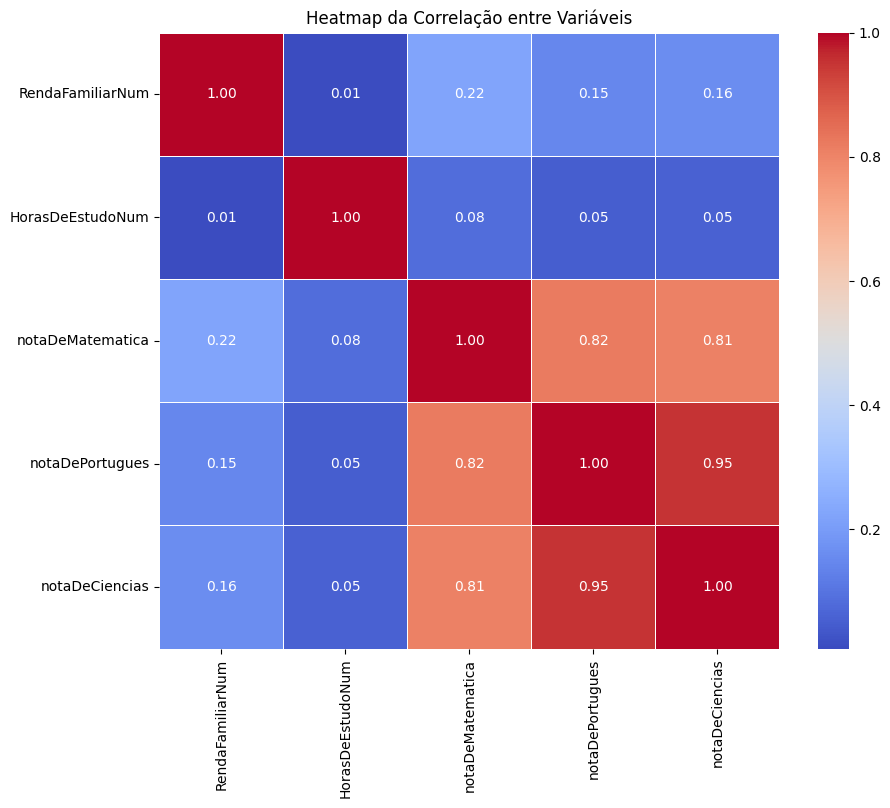

In [72]:
# Selecionando as colunas relevantes
heatmap_df3 = pandas_df3[['RendaFamiliarNum', 'HorasDeEstudoNum', 'notaDeMatematica', 'notaDePortugues', 'notaDeCiencias']]

# Calculando a Matrix de Correlação
corr_matrix = heatmap_df3.corr()

# Criando o gráfico de Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap da Correlação entre Variáveis')
plt.show()

## **Analisando o Heatmap:**

 - **Correlações Fortes:** As notas das disciplinas apresentam correlações fortes entre si, especialmente entre "notaDePortugues" e "notaDeCiencias" (0.95).
 - **Correlações Moderadas:** "RendaFamiliarNum" apresenta correlações moderadas com as notas das disciplinas, como observado anteriormente.
 - **Correlações Fracas:** "HorasDeEstudoNum" apresenta correlações fracas com as notas das disciplinas e com "RendaFamiliarNum".

## **4 - Visualização de Dados**

## **Média das Notas por Renda Familiar**

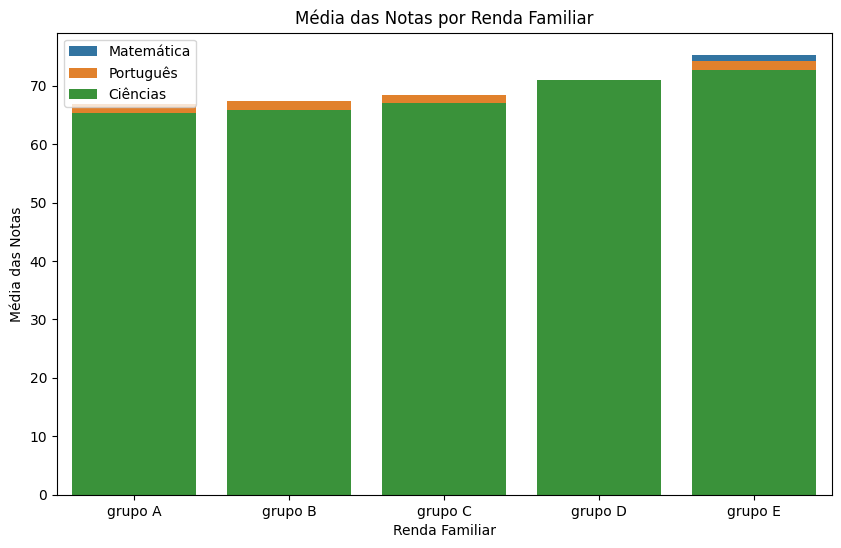

In [79]:
# Criando um gráfico de barras para comparar a média das notas em cada grupo de renda familiar
media_notas_por_renda = pandas_df3.groupby("RendaFamiliar")[["notaDeMatematica", "notaDePortugues", "notaDeCiencias"]].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x="RendaFamiliar", y="notaDeMatematica", data=media_notas_por_renda, label="Matemática")
sns.barplot(x="RendaFamiliar", y="notaDePortugues", data=media_notas_por_renda, label="Português")
sns.barplot(x="RendaFamiliar", y="notaDeCiencias", data=media_notas_por_renda, label="Ciências")

plt.xlabel("Renda Familiar")
plt.ylabel("Média das Notas")
plt.title("Média das Notas por Renda Familiar")
plt.legend()
plt.show()

## **Distribuíção das Notas**

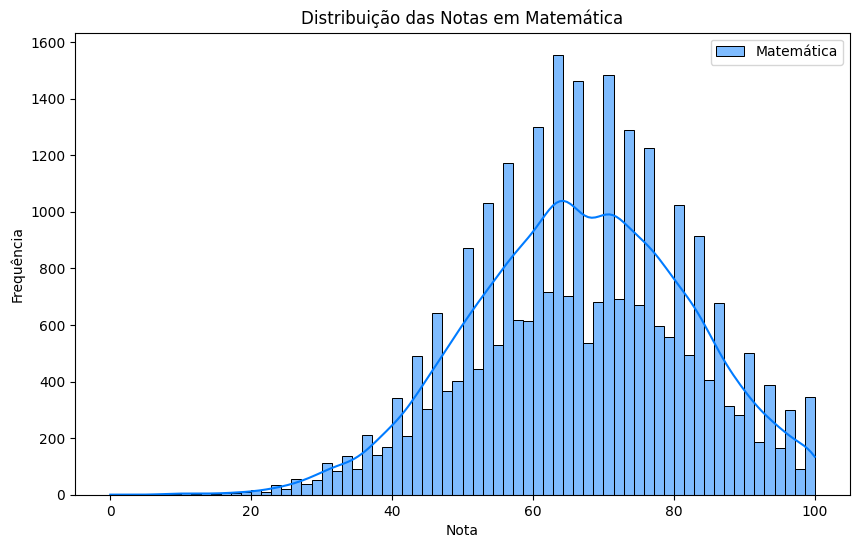

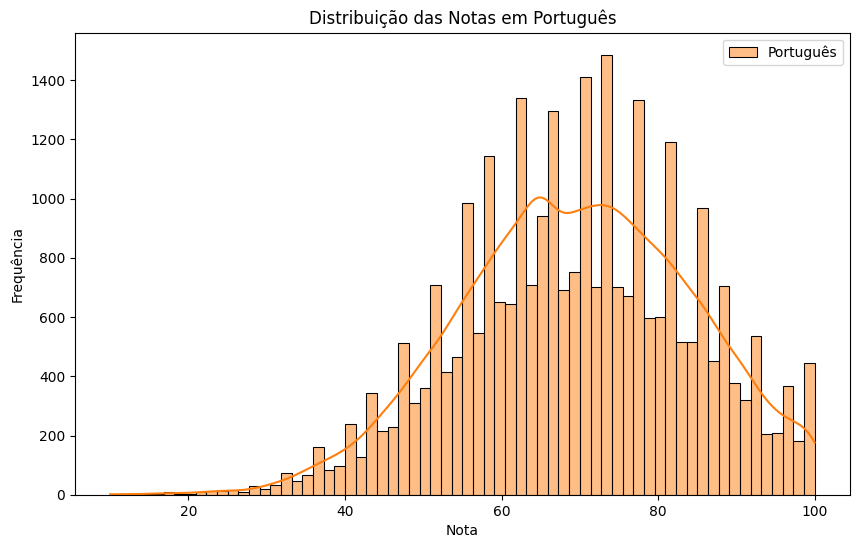

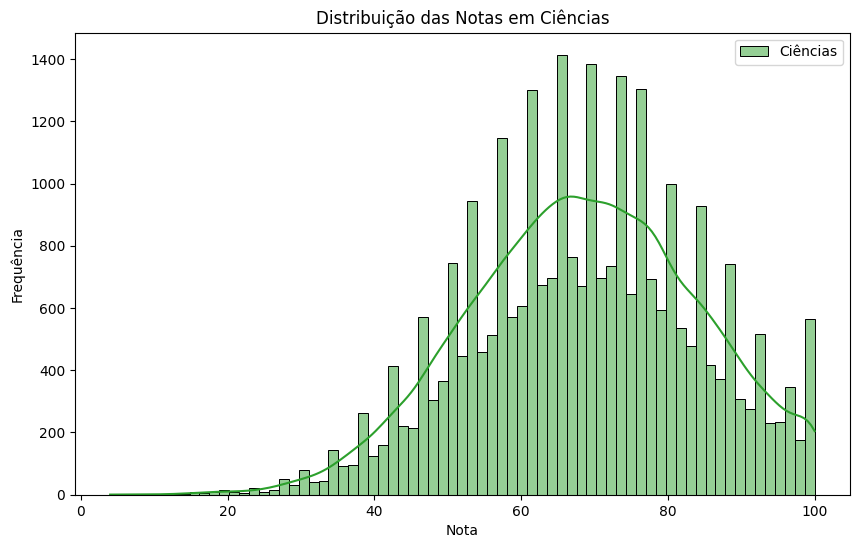

In [88]:
#Criando um histograma para visulaizar a distribuição das notas em cada disciplina
plt.figure(figsize=(10, 6))
sns.histplot(pandas_df3["notaDeMatematica"], label="Matemática", kde=True, color="#007bff")
plt.title("Distribuição das Notas em Matemática")
plt.xlabel("Nota")
plt.ylabel("Frequência")
plt.legend()
plt.show()
print("\n")

plt.figure(figsize=(10, 6))
sns.histplot(pandas_df3["notaDePortugues"], label="Português", kde=True, color="#ff7f0e")
plt.title("Distribuição das Notas em Português")
plt.xlabel("Nota")
plt.ylabel("Frequência")
plt.legend()
plt.show()
print("\n")

plt.figure(figsize=(10, 6))
sns.histplot(pandas_df3["notaDeCiencias"], label="Ciências", kde=True, color="#2ca02c")
plt.title("Distribuição das Notas em Ciências")
plt.xlabel("Nota")
plt.ylabel("Frequência")
plt.legend()
plt.show()

## **Relação entre Renda Familiar e Notas**

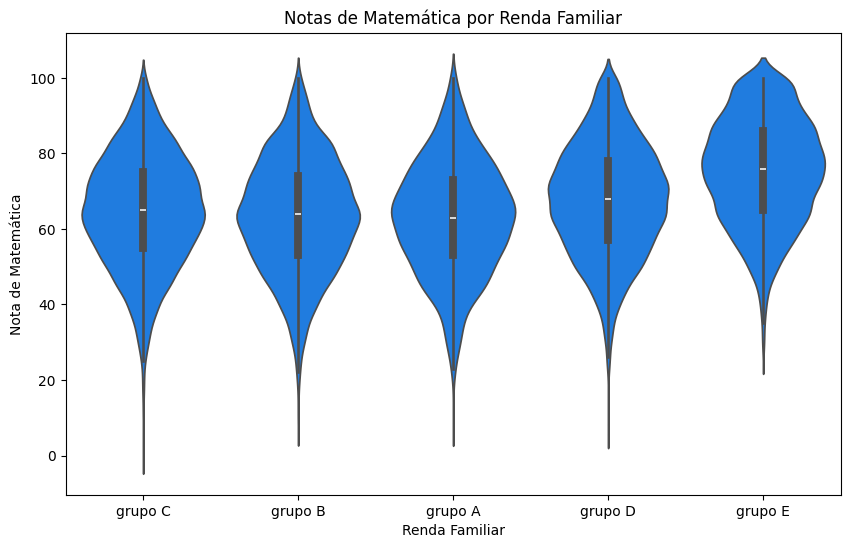

/n


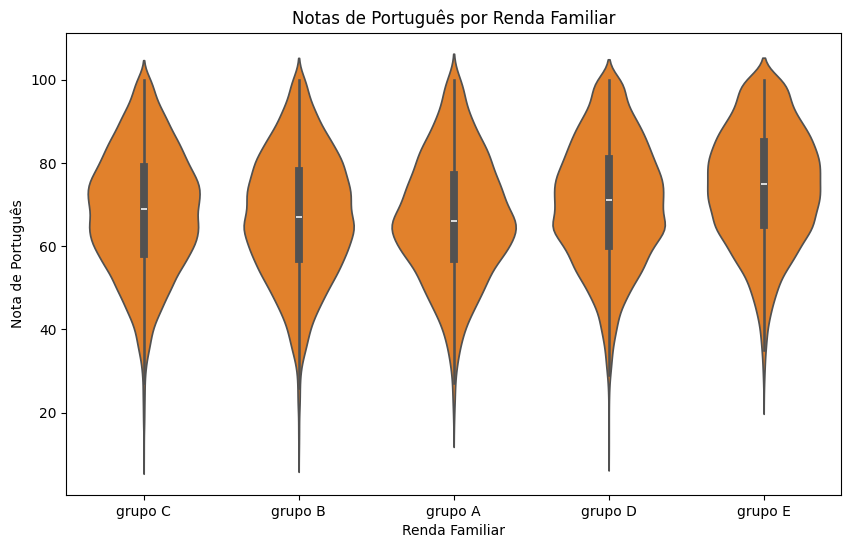

/n


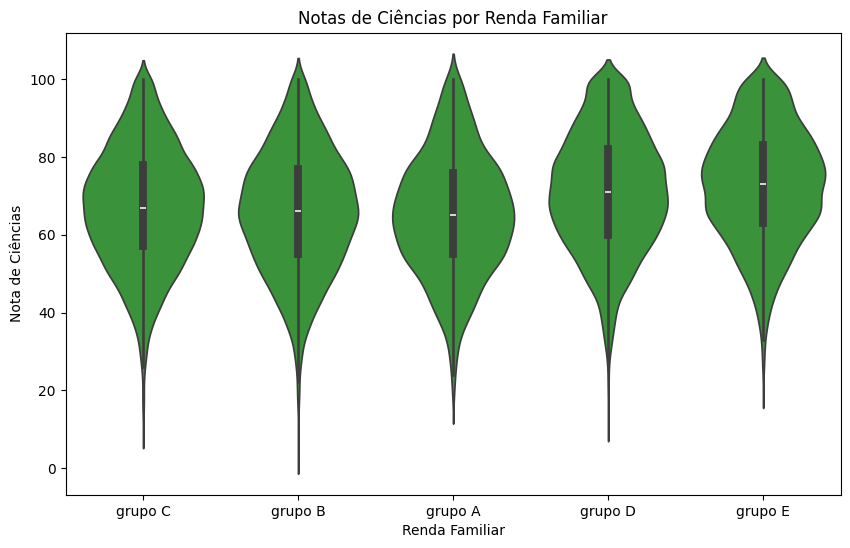

In [106]:
# Criando gráfico de Violin Plot

plt.figure(figsize=(10, 6))
sns.violinplot(x="RendaFamiliar", y="notaDeMatematica", data=pandas_df3, color="#007bff")
plt.xlabel("Renda Familiar")
plt.ylabel("Nota de Matemática")
plt.title("Notas de Matemática por Renda Familiar")
plt.show()
print("/n")

plt.figure(figsize=(10, 6))
sns.violinplot(x="RendaFamiliar", y="notaDePortugues", data=pandas_df3, color="#ff7f0e")
plt.xlabel("Renda Familiar")
plt.ylabel("Nota de Português")
plt.title("Notas de Português por Renda Familiar")
plt.show()
print("/n")

plt.figure(figsize=(10, 6))
sns.violinplot(x="RendaFamiliar", y="notaDeCiencias", data=pandas_df3, color="#2ca02c")
plt.xlabel("Renda Familiar")
plt.ylabel("Nota de Ciências")
plt.title("Notas de Ciências por Renda Familiar")
plt.show()


## **Interpretando os Violin Plots:**

**Matemática:**
 - A dispersão das notas é maior nos grupos de menor renda (C e B), indicando maior variabilidade no desempenho dos alunos.
 - A mediana das notas aumenta gradualmente com a renda familiar, sugerindo uma possível relação positiva entre renda e desempenho em matemática.

**Português:**
 - A dispersão das notas é um pouco menor em comparação com matemática, mas ainda é maior nos grupos de menor renda.
 - A mediana das notas também apresenta uma tendência de aumento com a renda familiar, embora menos pronunciada do que em matemática.

**Ciências:**
 - A dispersão das notas é relativamente consistente entre os grupos de renda familiar.
 - A mediana das notas aumenta ligeiramente com a renda familiar, mas a diferença entre os grupos é menos evidente.